In [16]:
import pandas as pd
from os import listdir
from os.path import isfile, join

# Read all results from txt files


aco_path = "./raw_files/ACO/"
aco_files = [f for f in listdir(aco_path) if isfile(join(aco_path, f))]

ga_path = "./raw_files/GA/"
ga_files = [f for f in listdir(ga_path) if isfile(join(ga_path, f))]

pso_path = "./raw_files/PSO/"
pso_files = [f for f in listdir(pso_path) if isfile(join(pso_path, f))]


# Ant Colony Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "E-factor"]
df_aco = pd.DataFrame(columns = column_names)

for file in aco_files:
    f_path = join(aco_path,file)
    # res = pd.read_csv(f_path, sep = ': ', header=None, engine='python', nrows=10)
    res = pd.read_csv(f_path, names=["A","B","C"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    evp = float(res['B'][5]) # evaporation factor

    sup = float(res['B'][6]) # minimum support
    pat = float(res['B'][8]) # patterns
    mit = int(res['B'][9]) # maximum iteraction count
    its = res.loc[res['B'] == ' Best Cost']['C'].values # iterations
    
    if att == 98:
        col = "C2K"
    elif att == 10:
        col = "B & C"
    elif att == 9:
        col = "UCI"
    elif att == 21:
        col = "Buoys"
    else:
        col = ""
                    
    df_aco = df_aco.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-iteration":mit, "Iterations":its, "E-factor": evp}, ignore_index=True)


    
    

# Genetic Algorithm - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "N-pop"]
df_ga = pd.DataFrame(columns = column_names)




# Particle Swarm Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "N-particle", "Velocity", "C1", "C2"]
df_pso = pd.DataFrame(columns = column_names)



In [17]:
df_aco

,Data-set,Size,Algorithm,Support,Run-time,Memory,Pattern-count,Max-iteration,Iterations,E-factor
0,UCI,19443,ACO-GRAANK (v4.0),0.5,137.300,143.0,3.0,100,"[ inf , inf , 1.89 , 1.89 , 1.89 , 1.89 ,...",0.1
1,B & C,116,ACO-GRAANK (v4.0),0.5,3.656,205.0,16.0,100,"[1.94, 1.49, 1.89, 1.89, 1.89, 1.89, 1.89, 1.8...",0.1
2,Buoys,6120,ACO-GRAANK (v4.0),0.5,295.800,227.0,62.0,100,"[1.92, 1.93, 1.82, 1.87, 1.71, 1.84, 1.88, 1.8...",0.1
3,UCI,19443,ACO-GRAANK (v4.0),0.5,165.100,147.0,6.0,100,"[1.89, 1.89, 1.89, 1.03, 1.9, 1.9, 1.9, 1.9, 1...",0.1
4,C2K,3943,ACO-GRAANK (v4.0),0.5,654.900,292.0,51.0,100,"[1.92, 1.96, 1.95, 1.65, 1.67, 1.91, 1.85, 1.9...",0.1
5,Buoys,6120,ACO-GRAANK (v4.0),0.5,302.000,226.0,45.0,100,"[1.99, 1.88, 1.9, 1.85, 1.67, 1.94, 1.94, 1.85...",0.1
6,UCI,19443,ACO-GRAANK (v4.0),0.5,158.100,146.0,4.0,100,"[1.92, 1.92, 1.92, 1.92, 1.92, 1.92, 1.92, 1.3...",0.1
7,C2K,3943,ACO-GRAANK (v4.0),0.5,699.600,292.0,47.0,100,"[1.92, 1.9, 1.9, 1.93, 1.96, 1.99, 1.96, 1.98,...",0.1
8,B & C,116,ACO-GRAANK (v4.0),0.5,3.972,205.0,20.0,100,"[1.89, 1.89, 1.89, 1.84, 1.43, 1.43, 1.92, 1.7...",0.1
9,C2K,3943,ACO-GRAANK (v4.0),0.5,625.100,291.0,36.0,100,"[1.83, 1.98, 1.96, 1.93, 1.96, 1.96, 1.95, 1.8...",0.1


In [18]:
#df_aco1 = df_aco[['Data-set', 'Algorithm', 'Pattern-count', 'Max-iteration', 'Iterations', 'E-factor']]

#df = df_aco1.groupby(["Algorithm", "E-factor", "Data-set"]).describe()
#df2 = pd.concat([df.min(), df.mean(), df.max(), df.std()], keys=['min', 'mean', 'max', 'std'], axis=1)
#df2.filter(like="Run-time")
#df2.columns = df2.columns.swaplevel(0, 1)
#df2.sort_index(axis=1, level=0, inplace=True, ascending=False)
#df.round(3)

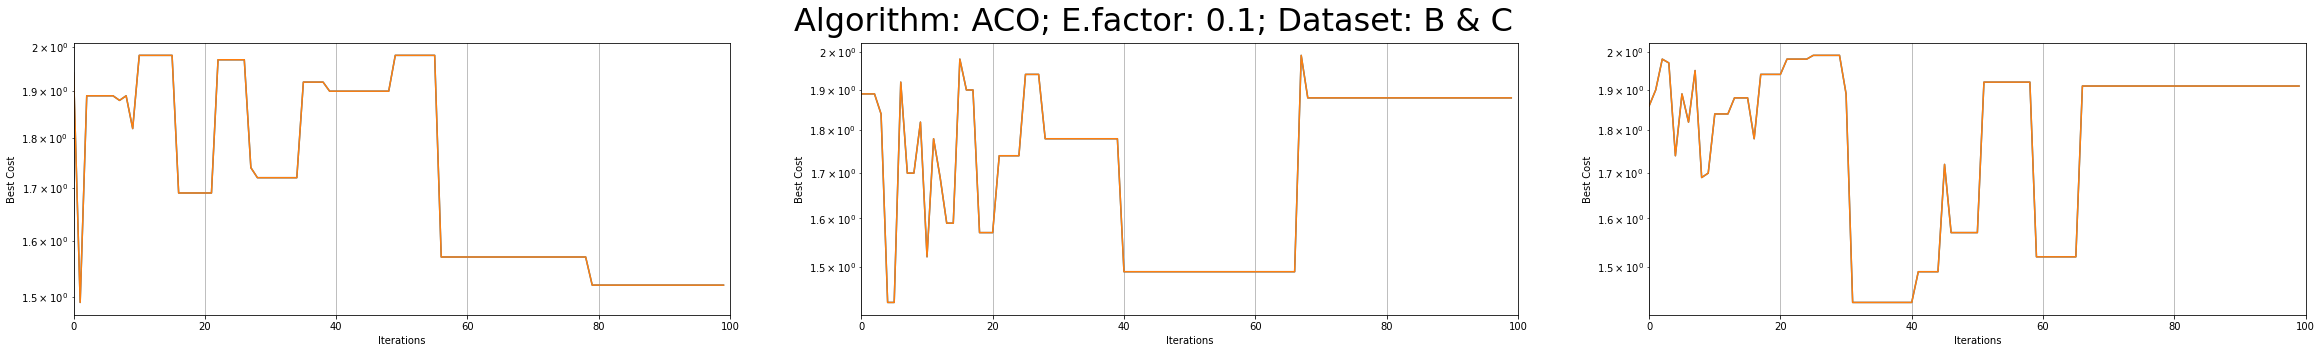

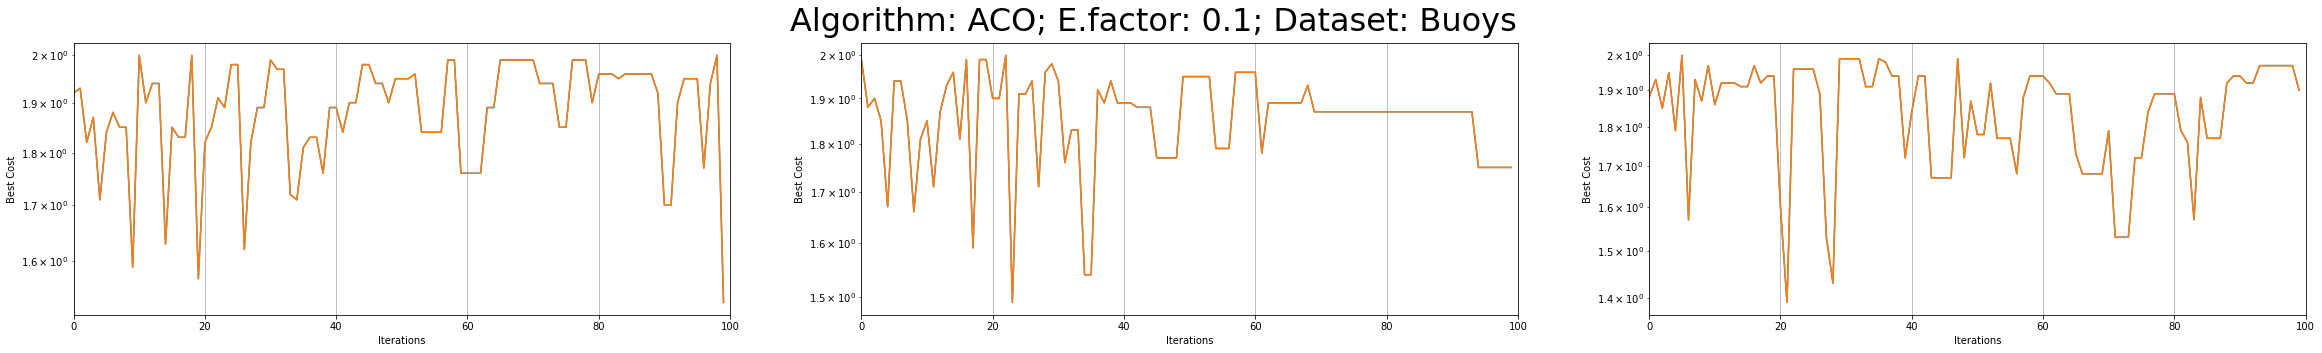

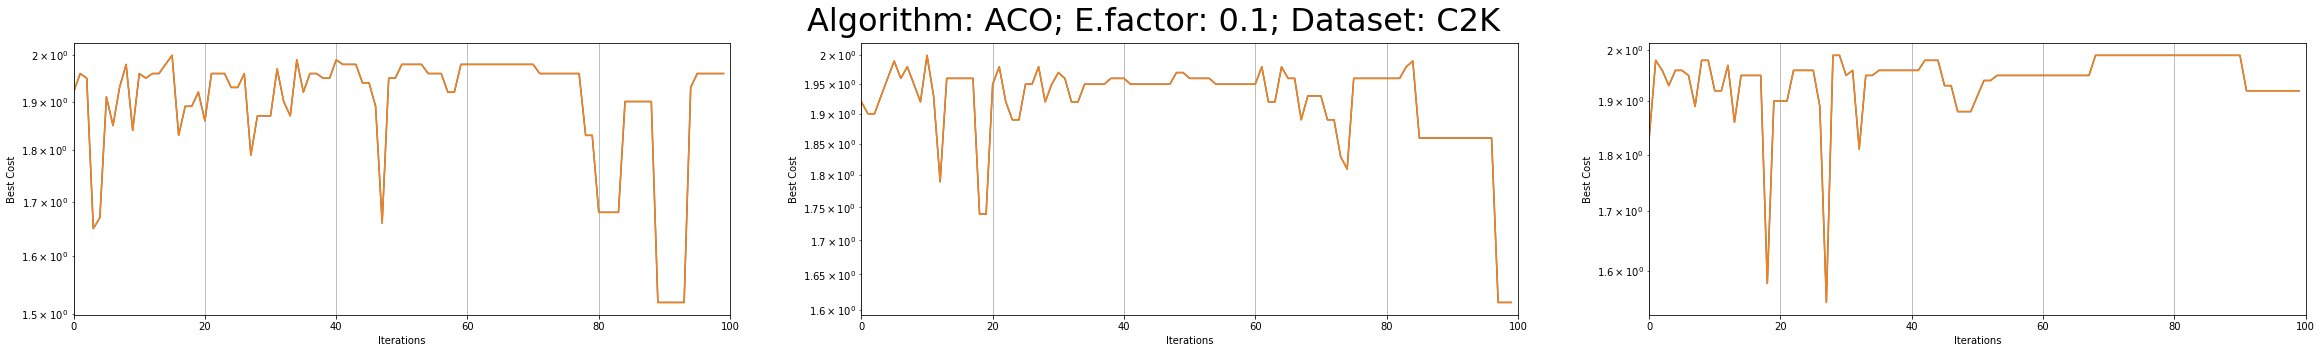

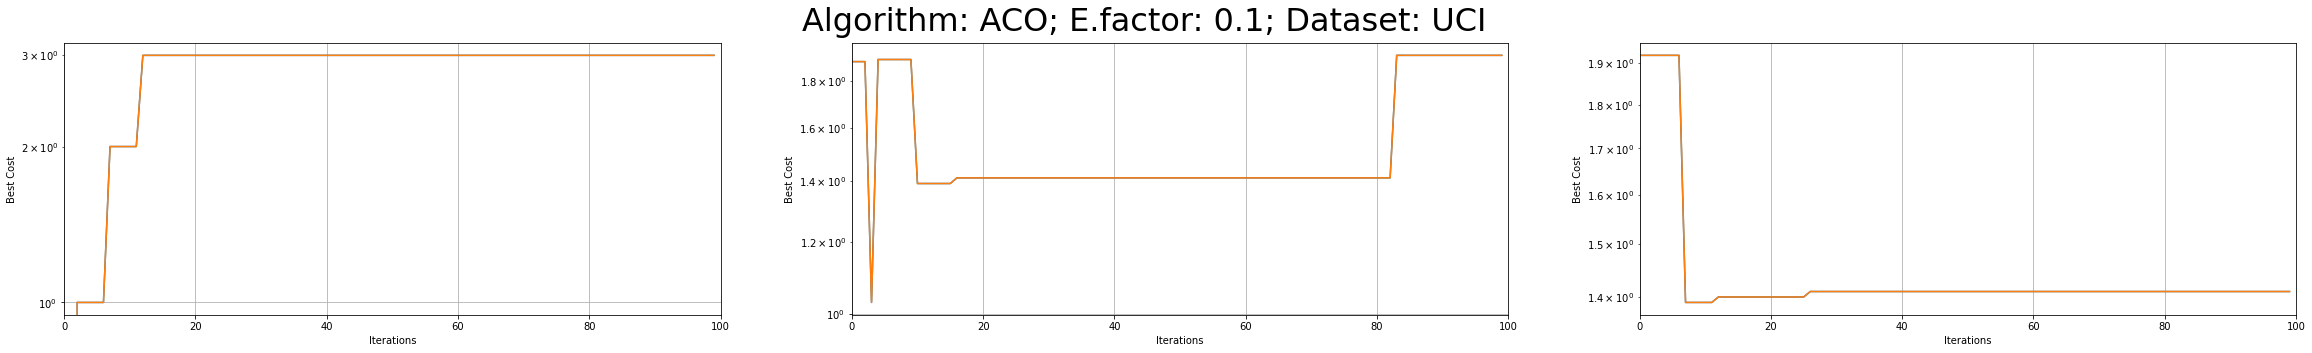

In [19]:
import matplotlib.pyplot as plt

data_sets = ['B & C', 'Buoys', 'C2K', 'UCI']
for ds in data_sets:
    df = df_aco.loc[df_aco['Data-set'] == ds]
    
    fig = plt.figure(figsize=(40,5))
    
    #fig = plt.figure()
    #axes = fig.subplots(nrows=1, ncols=4)
    i = 1

    for index,row in df.iterrows():
        # Results
        plt.subplot(1, 3, i)
        plt.plot(row['Iterations'])
        plt.semilogy(row['Iterations'])
        plt.xlim(0, row['Max-iteration'])
        plt.xlabel('Iterations')
        plt.ylabel('Best Cost')
        #plt.title('ACO, Dataset: ' + ds)
        plt.grid(True)
        i += 1
    
    fig.suptitle('Algorithm: ACO; E.factor: ' + str(row['E-factor']) + '; Dataset: ' + ds, fontsize=32)
    plt.show()